
# Movielens
This dataset describes 5-star rating and free-text tagging activity from [MovieLens](http://movielens.org), a movie recommendation service. It contains 26024289 ratings and 753170 tag applications across 45843 movies. These data were created by 270896 users between January 09, 1995 and August 04, 2017. This dataset was generated on August 04, 2017.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
from ggplot import *
import numpy as np
%matplotlib inline

/anaconda3/lib/python3.6/site-packages/ggplot/utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
/anaconda3/lib/python3.6/site-packages/ggplot/stats/smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
# the command below means that the output of multiple commands in a cell will be output at once.

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
data_path = "~/data-science/movielens/data/"

In [4]:
links = pd.read_csv(data_path+"links.csv")
movies = pd.read_csv(data_path+"movies.csv")
ratings = pd.read_csv(data_path+"ratings.csv")
tags = pd.read_csv(data_path+"tags.csv")
genome_scores = pd.read_csv(data_path+"genome-scores.csv")
genome_tags = pd.read_csv(data_path+"genome-tags.csv")

# Movies

Only movies with at least one rating or tag are included in the dataset. Movie ids are consistent between `ratings.csv`, `tags.csv`, `movies.csv`, and `links.csv`.

Genres are a pipe-separated list, and are selected from the following:

* Action
* Adventure
* Animation
* Children's
* Comedy
* Crime
* Documentary
* Drama
* Fantasy
* Film-Noir
* Horror
* Musical
* Mystery
* Romance
* Sci-Fi
* Thriller
* War
* Western
* (no genres listed)

In [5]:
movies.shape
movies.head(25)

(45843, 3)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller



# Ratings
All ratings are contained in the file `ratings.csv`. Each line of this file after the header row represents one rating of one movie by one user, and has the following format:

    userId,movieId,rating,timestamp

The lines within this file are ordered first by userId, then, within user, by movieId.

Ratings are made on a 5-star scale, with half-star increments (0.5 stars - 5.0 stars).

In [6]:
ratings.shape
ratings.head(25)

(26024289, 4)

,userId,movieId,rating,timestamp
0,1,110,1.0,1425941529
1,1,147,4.5,1425942435
2,1,858,5.0,1425941523
3,1,1221,5.0,1425941546
4,1,1246,5.0,1425941556
5,1,1968,4.0,1425942148
6,1,2762,4.5,1425941300
7,1,2918,5.0,1425941593
8,1,2959,4.0,1425941601
9,1,4226,4.0,1425942228


In [7]:
#Top 10 user ids interms of number of ratings
ratings["userId"].value_counts().nlargest(10)

45811     18276
8659       9279
270123     7638
179792     7515
228291     7410
243443     6320
98415      6094
229879     6024
98787      5814
172224     5701
Name: userId, dtype: int64

# Tags
All tags are contained in the file `tags.csv`. Each line of this file after the header row represents one tag applied to one movie by one user, and has the following format:

    userId,movieId,tag,timestamp

The lines within this file are ordered first by userId, then, within user, by movieId.

In [8]:
tags.shape
tags.head(25)

(753170, 4)

,userId,movieId,tag,timestamp
0,1,318,narrated,1425942391
1,20,4306,Dreamworks,1459855607
2,20,89302,England,1400778834
3,20,89302,espionage,1400778836
4,20,89302,jazz,1400778841
5,20,89302,politics,1400778841
6,20,96079,nostalgic,1407930249
7,20,113315,coming of age,1407837917
8,20,113315,dark comedy,1407838006
9,20,113315,kafkaesque,1407837913


# Genome
The tag genome is a data structure that contains tag relevance scores for movies.  The structure is a dense matrix: each movie in the genome has a value for *every* tag in the genome.

The tag genome encodes how strongly movies exhibit particular properties represented by tags (atmospheric, thought-provoking, realistic, etc.). The tag genome was computed using a machine learning algorithm on user-contributed content including tags, ratings, and textual reviews.

The genome is split into two files.  The file `genome-scores.csv` contains movie-tag relevance data in the following format:

    movieId,tagId,relevance

The second file, `genome-tags.csv`, provides the tag descriptions for the tag IDs in the genome file, in the following format:

    tagId,tag

In [9]:
genome_scores.shape
genome_scores.head(25)

(12400104, 3)

,movieId,tagId,relevance
0,1,1,0.02475
1,1,2,0.02475
2,1,3,0.04900
3,1,4,0.07750
4,1,5,0.12450
5,1,6,0.23875
6,1,7,0.06575
7,1,8,0.28575
8,1,9,0.25400
9,1,10,0.02625


In [10]:
genome_tags.shape
genome_tags.head(25)

(1128, 2)

,tagId,tag
0,1,007
1,2,007 (series)
2,3,18th century
3,4,1920s
4,5,1930s
5,6,1950s
6,7,1960s
7,8,1970s
8,9,1980s
9,10,19th century


# Links

Identifiers that can be used to link to other sources of movie data are contained in the file `links.csv`. Each line of this file after the header row represents one movie, and has the following format:

    movieId,imdbId,tmdbId

movieId is an identifier for movies used by <https://movielens.org>. E.g., the movie Toy Story has the link <https://movielens.org/movies/1>.

imdbId is an identifier for movies used by <http://www.imdb.com>. E.g., the movie Toy Story has the link <http://www.imdb.com/title/tt0114709/>.

tmdbId is an identifier for movies used by <https://www.themoviedb.org>. E.g., the movie Toy Story has the link <https://www.themoviedb.org/movie/862>.

Use of the resources listed above is subject to the terms of each provider.

In [11]:
links.shape
links.head(10)

(45843, 3)

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
5,6,113277,949.0
6,7,114319,11860.0
7,8,112302,45325.0
8,9,114576,9091.0
9,10,113189,710.0


In [12]:
#Function using regex to extract year from the title
def extract_year(_timestamp):
    pattern = re.findall("[1-2][0-9][0-9][0-9]",_timestamp)
    for p in pattern:
        return p
        
    


In [13]:
#Using apply method to loop through each row and extract the year
movies['year'] = movies['title'].apply(extract_year)
movies.tail(20)

,movieId,title,genres,year
45823,176229,The Devilish Tenant (1909),Comedy|Fantasy,1909
45824,176231,The Untameable Whiskers (1904),(no genres listed),1904
45825,176233,The Imperceptable Transmutations (1904),(no genres listed),1904
45826,176235,Pooh's Heffalump Halloween Movie (2005),Animation|Children,2005
45827,176237,The One-Man Band (1900),Action|Fantasy|Thriller,1900
45828,176239,The Fat and Lean Wrestling Match (1900),Comedy|Fantasy,1900
45829,176245,Deep Hearts (1981),Documentary,1981
45830,176249,Mom (2017),Crime|Drama|Thriller,2017
45831,176251,The Morning After (2015),Comedy|Drama,2015
45832,176253,St. Michael Had a Rooster (1972),(no genres listed),1972


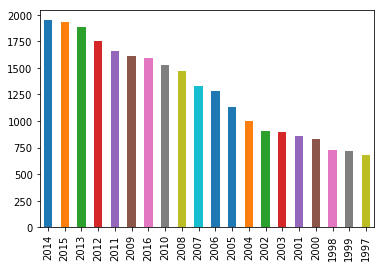

In [14]:
#Top 20 number of movies released per year
movies['year'].value_counts().nlargest(20).plot(kind="bar")

In [15]:
#Since movieId is consistent within ratings and movies, we perform an inner join 
movie_ratings = ratings.merge(movies, left_on='movieId', right_on='movieId', how='inner')
movie_ratings.head()

,userId,movieId,rating,timestamp,title,genres,year
0,1,110,1.0,1425941529,Braveheart (1995),Action|Drama|War,1995
1,11,110,3.5,1231676989,Braveheart (1995),Action|Drama|War,1995
2,22,110,5.0,1111937009,Braveheart (1995),Action|Drama|War,1995
3,24,110,5.0,979870012,Braveheart (1995),Action|Drama|War,1995
4,29,110,3.0,1044020005,Braveheart (1995),Action|Drama|War,1995


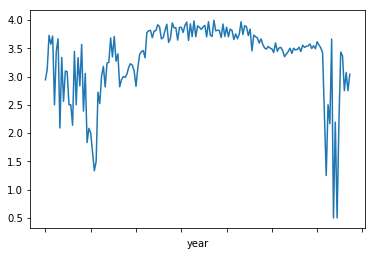

In [16]:
#Trends on movie ratings
movie_ratings.groupby('year')['rating'].mean().plot(kind="line")

In [17]:
#What are the 20 most rated movies?
movie_ratings.groupby('title').size().sort_values(ascending=False).nlargest(20)

title
Forrest Gump (1994)                                                               91921
Shawshank Redemption, The (1994)                                                  91082
Pulp Fiction (1994)                                                               87901
Silence of the Lambs, The (1991)                                                  84078
Matrix, The (1999)                                                                77960
Star Wars: Episode IV - A New Hope (1977)                                         77045
Jurassic Park (1993)                                                              74355
Schindler's List (1993)                                                           67662
Braveheart (1995)                                                                 66512
Toy Story (1995)                                                                  66008
Star Wars: Episode VI - Return of the Jedi (1983)                                 62714
Terminator 2: Judgment Day

In [18]:
movie_stats = movie_ratings.groupby('title').agg({'rating': [np.size, np.mean]})
movie_stats.head()

rating          
                                                     size      mean
title                                                              
"Great Performances" Cats (1998)                    219.0  2.796804
#1 Cheerleader Camp (2010)                            7.0  2.785714
#Horror (2015)                                       12.0  2.000000
#chicagoGirl: The Social Network Takes on a Dic...    4.0  3.625000
$ (Dollars) (1971)                                   29.0  2.758621

In [19]:
movie_stats.sort_values([('rating', 'mean')],ascending=False)[:25]

rating     
                                                     size mean
title                                                         
Sondheim! The Birthday Concert (2010)                 1.0  5.0
Robin Williams - Off the Wall (1978)                  1.0  5.0
Miracle in the Rain (1956)                            1.0  5.0
Dr. Monica (1934)                                     1.0  5.0
Last Man Standing (2011)                              1.0  5.0
Last Sunset (2006)                                    1.0  5.0
Into the Middle of Nowhere (2010)                     1.0  5.0
Giovannona Long-Thigh (1973)                          1.0  5.0
Rajathandhiram (2015)                                 1.0  5.0
Paradigm (1969)                                       1.0  5.0
Taken in Broad Daylight (2009)                        1.0  5.0
Alive Day Memories: Home from Iraq (Occupation ...    1.0  5.0
Latin Music USA (2009)                                1.0  5.0
What Other Couples Do (2013)                          1.0  5.0
Catch That Girl (2002)                                1.0  5.0
A Daughter's Nightmare (2014)                         1.0  5.0
Double Daddy (2015)                                   1.0  5.0
The Star of Bethlehem (2007)                          1.0  5.0
Ramona (1936)                                         1.0  5.0
Milton Glaser: To Inform & Delight (2008)             1.0  5.0
Catching Out (2003)                                   1.0  5.0
Panorama of Esplanade by Night (1901)                 3.0  5.0
Back to You and Me (2005)                             1.0  5.0
Assepoester: Een Modern Sprookje (2014)               1.0  5.0
Donos de Portugal (2012)                              1.0  5.0

In [20]:
#For all movies that have atleast ten thousand ratings, we can get the mean rating for the top 25
atleast_10000 = movie_stats['rating']['size'] >= 10000
movie_stats[atleast_10000].sort_values([('rating', 'mean')],ascending=False)[:25]

rating          
                                                       size      mean
title                                                                
Shawshank Redemption, The (1994)                    91082.0  4.429015
Godfather, The (1972)                               57070.0  4.339811
Usual Suspects, The (1995)                          59271.0  4.300189
Schindler's List (1993)                             67662.0  4.266531
Godfather: Part II, The (1974)                      36679.0  4.263475
Seven Samurai (Shichinin no samurai) (1954)         13994.0  4.255074
Rear Window (1954)                                  21335.0  4.232552
12 Angry Men (1957)                                 16896.0  4.231209
Fight Club (1999)                                   60024.0  4.230716
One Flew Over the Cuckoo's Nest (1975)              40103.0  4.229135
Casablanca (1942)                                   30043.0  4.214393
Dr. Strangelove or: How I Learned to Stop Worry...  28280.0  4.213030
North by Northwest (1959)                           19013.0  4.205228
Spirited Away (Sen to Chihiro no kamikakushi) (...  20855.0  4.202589
City of God (Cidade de Deus) (2002)                 19947.0  4.187873
Dark Knight, The (2008)                             39600.0  4.182071
Goodfellas (1990)                                   33987.0  4.178289
Pulp Fiction (1994)                                 87901.0  4.169975
Life Is Beautiful (La Vita è bella) (1997)          25245.0  4.167063
Inception (2010)                                    35297.0  4.161756
Chinatown (1974)                                    18397.0  4.157716
To Kill a Mockingbird (1962)                        17374.0  4.157649
Memento (2000)                                      40706.0  4.157078
Monty Python and the Holy Grail (1975)              39058.0  4.155154
Matrix, The (1999)                                  77960.0  4.154098

In [21]:
def splitDataFrameList(df,target_column,separator):
    ''' df = dataframe to split,
    target_column = the column containing the values to split
    separator = the symbol used to perform the split

    returns: a dataframe with each entry for the target column separated, with each element moved into a new row. 
    The values in the other columns are duplicated across the newly divided rows.
    '''
    def splitListToRows(row,row_accumulator,target_column,separator):
        split_row = row[target_column].split(separator)
        for s in split_row:
            new_row = row.to_dict()
            new_row[target_column] = s
            row_accumulator.append(new_row)
    new_rows = []
    df.apply(splitListToRows,axis=1,args = (new_rows,target_column,separator))
    new_df = pd.DataFrame(new_rows)
    return new_df

In [22]:
movies = splitDataFrameList(movies, "genres","|")

In [23]:
movies.head(20)

,genres,movieId,title,year
0,Adventure,1,Toy Story (1995),1995
1,Animation,1,Toy Story (1995),1995
2,Children,1,Toy Story (1995),1995
3,Comedy,1,Toy Story (1995),1995
4,Fantasy,1,Toy Story (1995),1995
5,Adventure,2,Jumanji (1995),1995
6,Children,2,Jumanji (1995),1995
7,Fantasy,2,Jumanji (1995),1995
8,Comedy,3,Grumpier Old Men (1995),1995
9,Romance,3,Grumpier Old Men (1995),1995


In [24]:
movies.reset_index(drop=True)
movies.head()

,genres,movieId,title,year
0,Adventure,1,Toy Story (1995),1995
1,Animation,1,Toy Story (1995),1995
2,Children,1,Toy Story (1995),1995
3,Comedy,1,Toy Story (1995),1995
4,Fantasy,1,Toy Story (1995),1995
5,Adventure,2,Jumanji (1995),1995
6,Children,2,Jumanji (1995),1995
7,Fantasy,2,Jumanji (1995),1995
8,Comedy,3,Grumpier Old Men (1995),1995
9,Romance,3,Grumpier Old Men (1995),1995


,genres,movieId,title,year
0,Adventure,1,Toy Story (1995),1995
1,Animation,1,Toy Story (1995),1995
2,Children,1,Toy Story (1995),1995
3,Comedy,1,Toy Story (1995),1995
4,Fantasy,1,Toy Story (1995),1995
